In [1]:
import pandas as pd

In [2]:
df = pd.read_table("C:/Users/darsh/Desktop/Datasets/Group B/heart_disease.txt",delimiter=",")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,2.0,2.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


# matplotlib.pyplot Visualization

In [3]:
import matplotlib.pyplot as plt

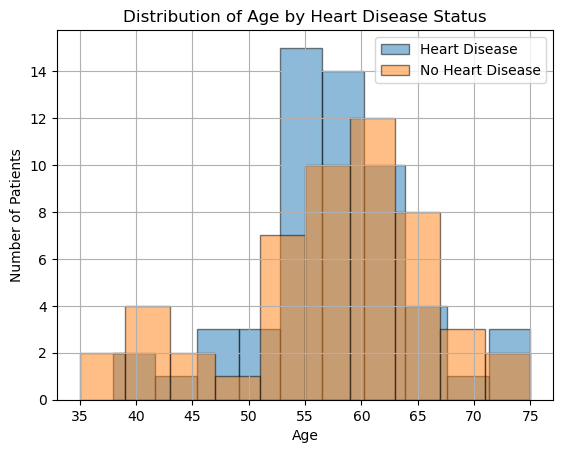

In [4]:
# Filter data for individuals with heart disease
heart_disease_age = df[df['output'] == 1]['age']

# Filter data for individuals without heart disease
no_heart_disease_age = df[df['output'] == 0]['age']

# Plot histograms
plt.hist(heart_disease_age, bins=10, edgecolor='black', alpha=0.5, label='Heart Disease')
plt.hist(no_heart_disease_age, bins=10, edgecolor='black', alpha=0.5, label='No Heart Disease')

plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Age by Heart Disease Status')
plt.legend()
plt.grid(True)
plt.show()


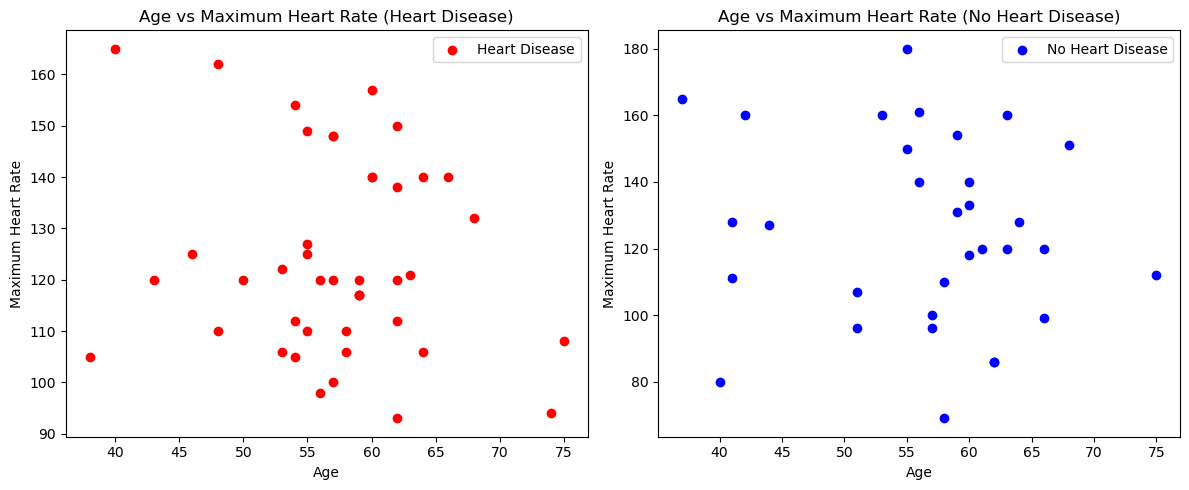

In [5]:
# Filter data for individuals with heart disease
heart_disease = df[df['output'] == 1]

# Filter data for individuals without heart disease
no_heart_disease = df[df['output'] == 0]

# Plot scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(heart_disease["age"], heart_disease["thalachh"], color='red', label='Heart Disease')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Age vs Maximum Heart Rate (Heart Disease)")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(no_heart_disease["age"], no_heart_disease["thalachh"], color='blue', label='No Heart Disease')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("Age vs Maximum Heart Rate (No Heart Disease)")
plt.legend()

plt.tight_layout()
plt.show()

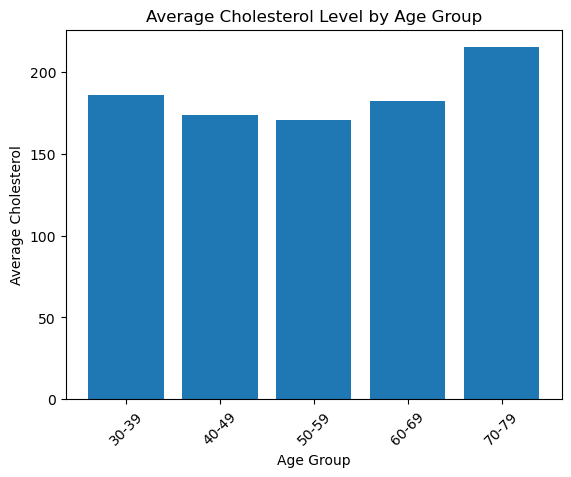

In [6]:
import numpy as np
age_bins = np.arange(20, 90, 10)  
age_labels = [f"{age}-{age+9}" for age in age_bins[:-1]] 
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
avg_chol_by_age = df.groupby('age_group')['chol'].mean()

# Plot bar plot
plt.bar(avg_chol_by_age.index, avg_chol_by_age)
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol')
plt.title('Average Cholesterol Level by Age Group')
plt.xticks(rotation=45)  
plt.show()

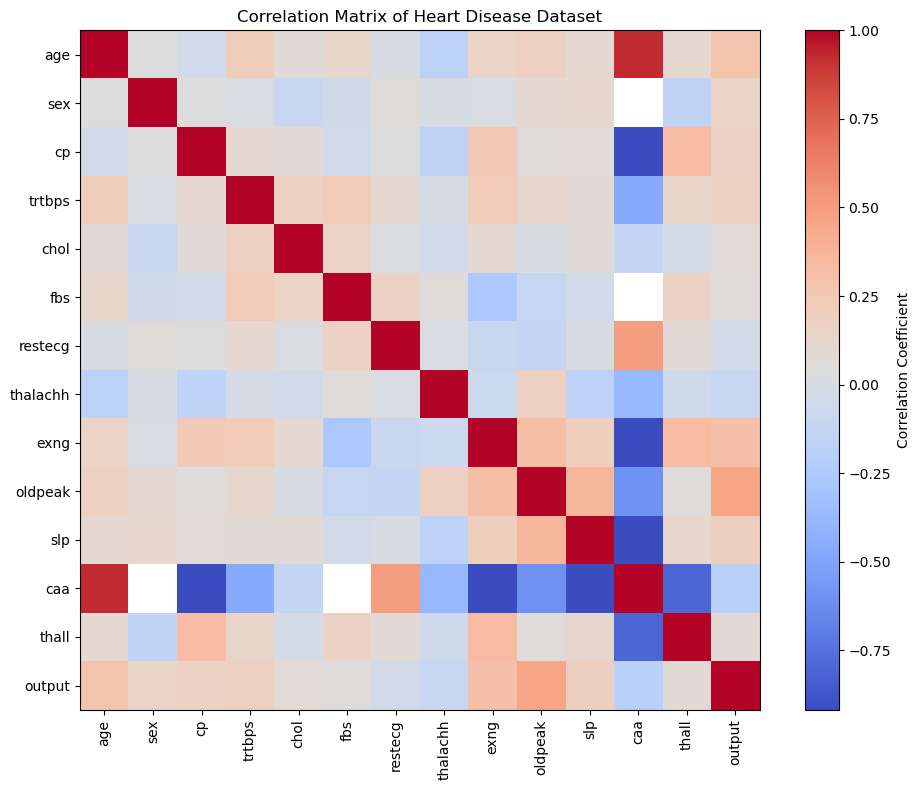

In [7]:
# Drop non-numeric columns
numeric_df = df.drop(['age_group'], axis=1)

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.tight_layout()
plt.show()

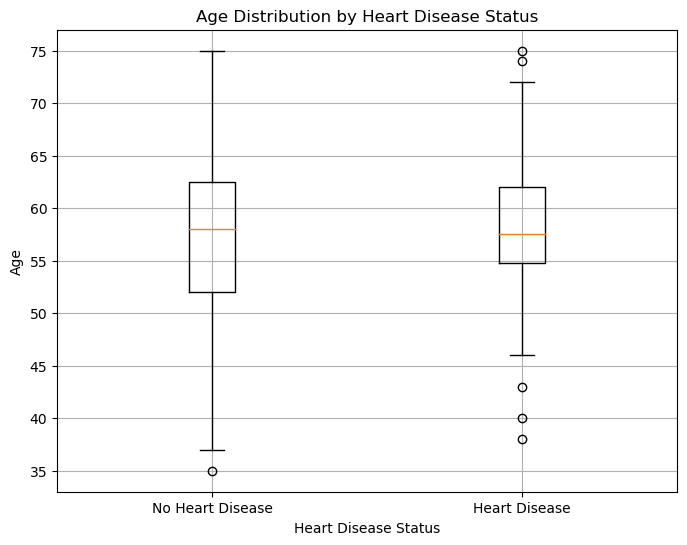

In [8]:
# Box plot for age distribution by heart disease status
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['output'] == 0]['age'], df[df['output'] == 1]['age']], labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease Status')
plt.grid(True)
plt.show()

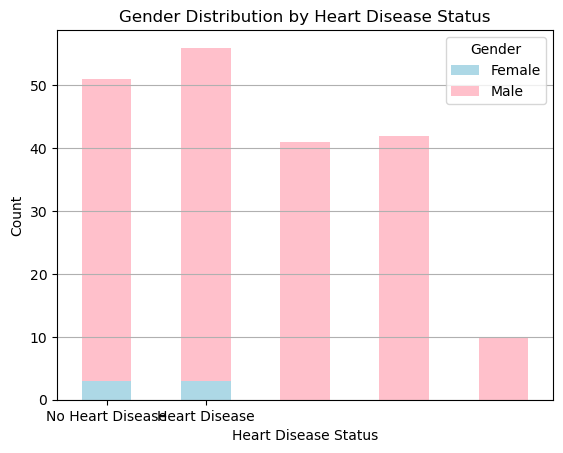

In [9]:
# Bar plot for gender distribution by heart disease status
gender_counts = df.groupby(['output', 'sex']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, color=['lightblue', 'pink'])
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.title('Gender Distribution by Heart Disease Status')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.legend(['Female', 'Male'], title='Gender')
plt.grid(axis='y')
plt.show()

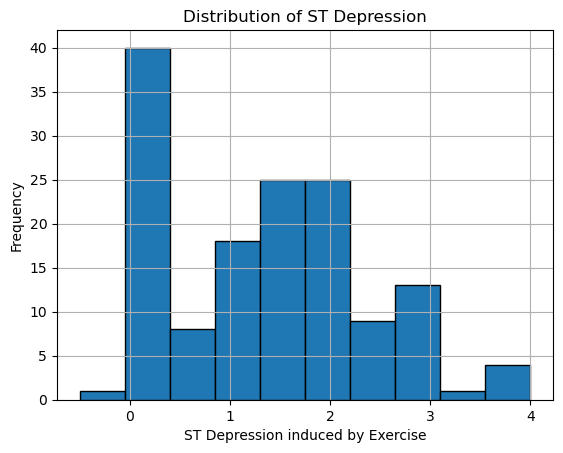

In [10]:
plt.hist(df['oldpeak'], bins=10, edgecolor='black')
plt.xlabel('ST Depression induced by Exercise')
plt.ylabel('Frequency')
plt.title('Distribution of ST Depression')
plt.grid(True)
plt.show()

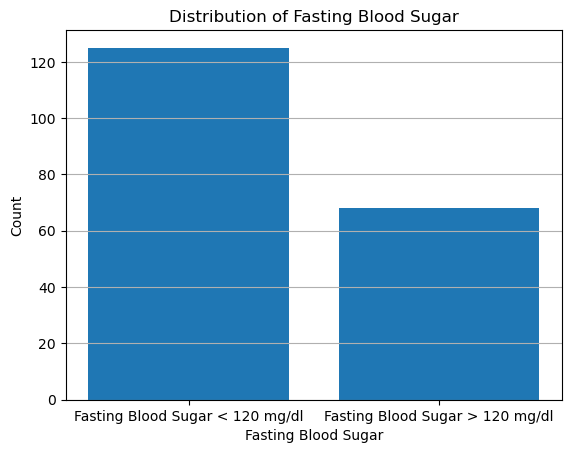

In [11]:
fbs_counts = df['fbs'].value_counts()
plt.bar(['Fasting Blood Sugar < 120 mg/dl', 'Fasting Blood Sugar > 120 mg/dl'], fbs_counts.values)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar')
plt.grid(axis='y')
plt.show()

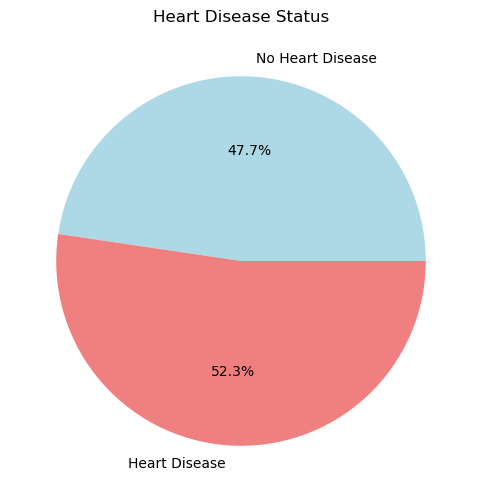

In [12]:
# Count heart disease status
heart_disease_counts = df['output'].value_counts()

heart_disease_counts = heart_disease_counts.loc[[0, 1]]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Heart Disease Status')
plt.show()

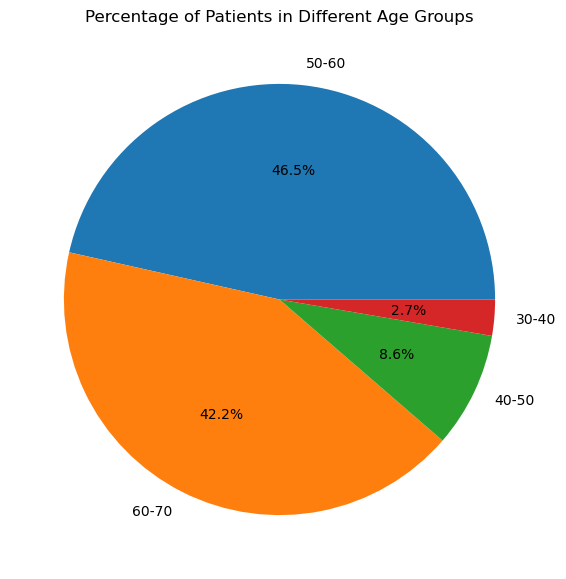

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [30, 40, 50, 60, 70]
labels = ["30-40", "40-50", "50-60", "60-70"]
df["age_group"] = pd.cut(df['age'], bins=bins, labels=labels)

age_percentages = (df["age_group"].value_counts(normalize=True) * 100).to_frame().reset_index().rename(columns={"index": "Age Group", "age_group": "Percentage"})

plt.figure(figsize=(10, 7))
plt.pie(age_percentages["proportion"], labels=age_percentages["Percentage"], autopct="%1.1f%%")
plt.title("Percentage of Patients in Different Age Groups")
plt.show()

# seaborn Visualization

In [14]:
import seaborn as sns

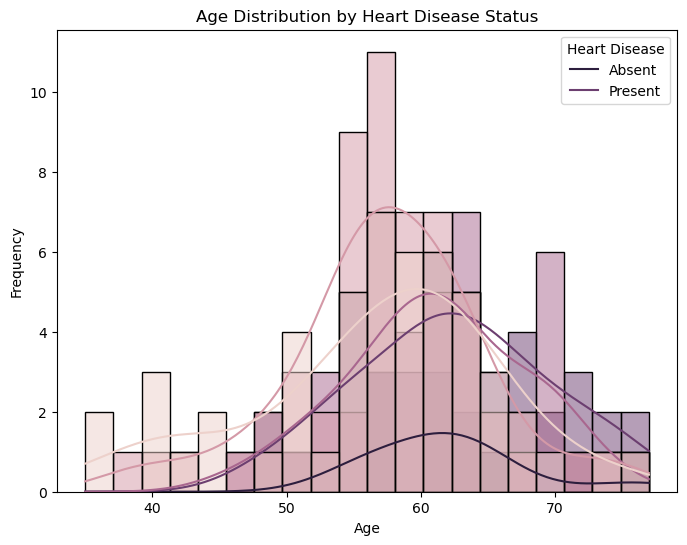

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='output', bins=20, kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

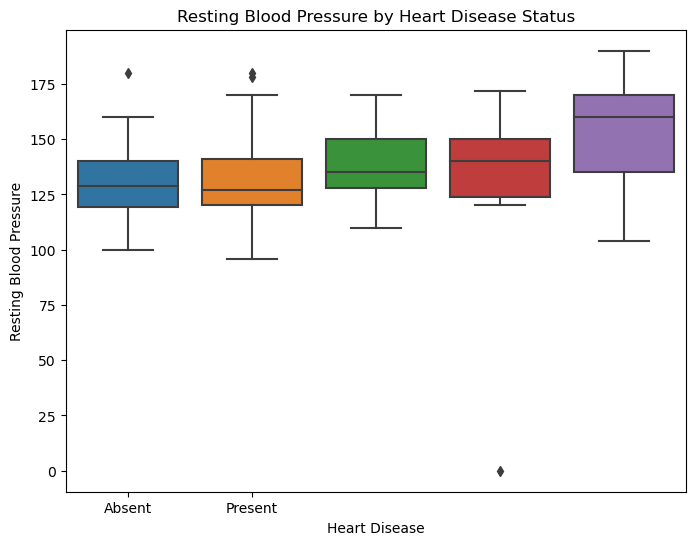

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='output', y='trtbps')
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.xticks([0, 1], ['Absent', 'Present'])
plt.show()

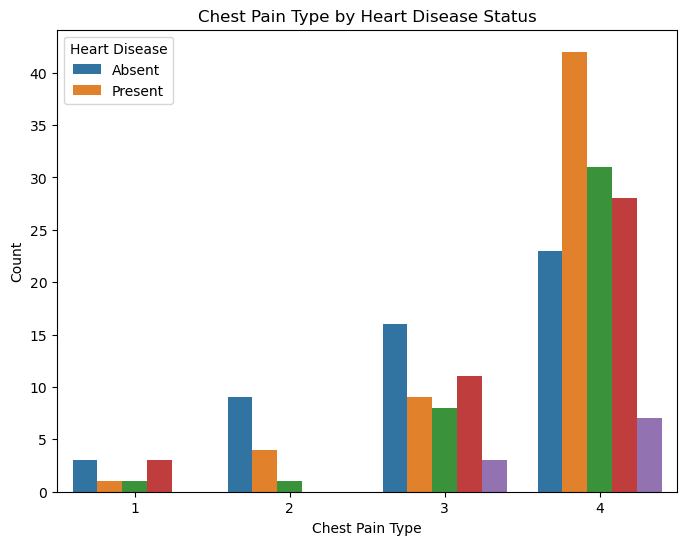

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', hue='output')
plt.title('Chest Pain Type by Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

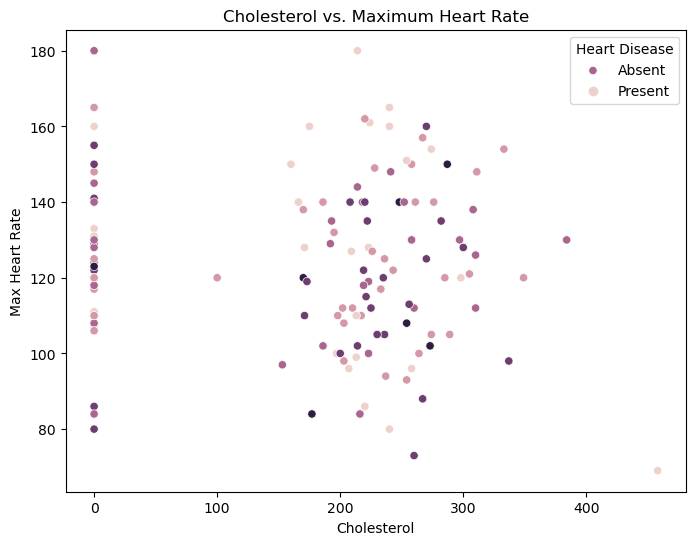

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='chol', y='thalachh', hue='output')
plt.title('Cholesterol vs. Maximum Heart Rate')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

C:\Users\darsh\AppData\Local\Temp\ipykernel_16492\667295573.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='output', ci=None)


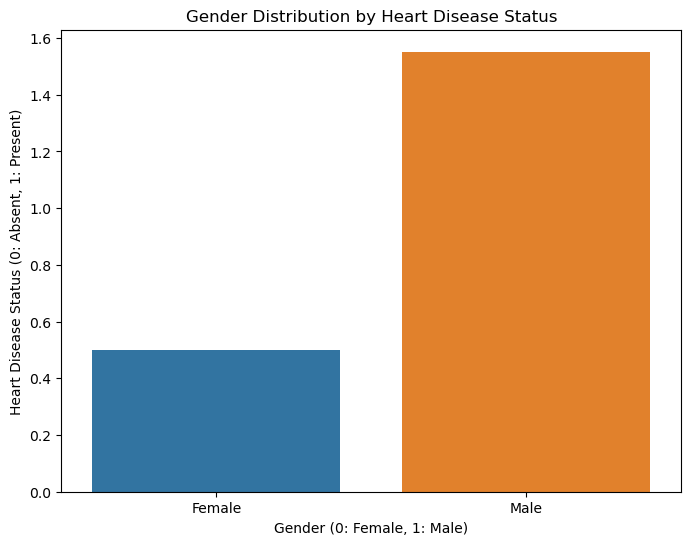

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='output', ci=None)
plt.title('Gender Distribution by Heart Disease Status')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Heart Disease Status (0: Absent, 1: Present)')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

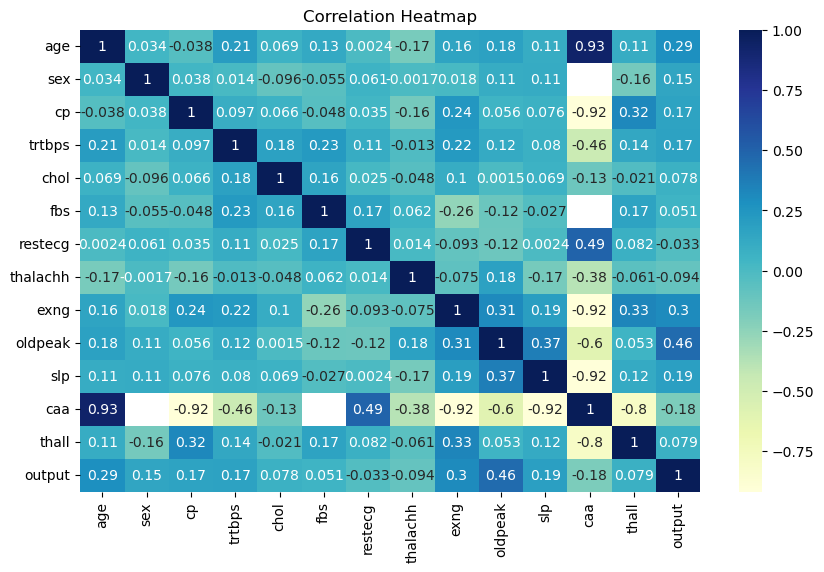

In [27]:
# For simplicity, let's drop any non-numeric columns
numeric_df = df.select_dtypes(include=['float', 'int'])

# Create the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap')
plt.show()

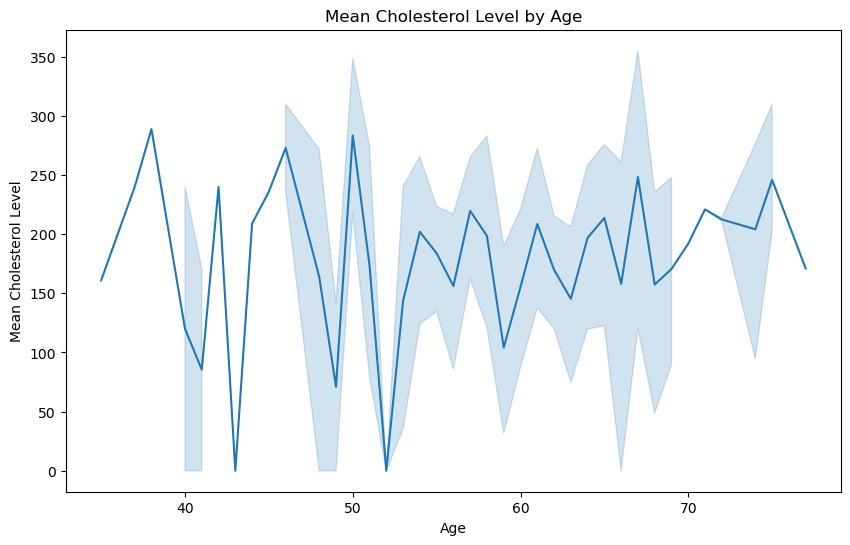

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='chol', estimator='mean')
plt.title('Mean Cholesterol Level by Age')
plt.xlabel('Age')
plt.ylabel('Mean Cholesterol Level')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='output', y='chol')
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Cholesterol Level')
plt.xticks([0, 1], ['Absent', 'Present'])
plt.show()

C:\Users\darsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

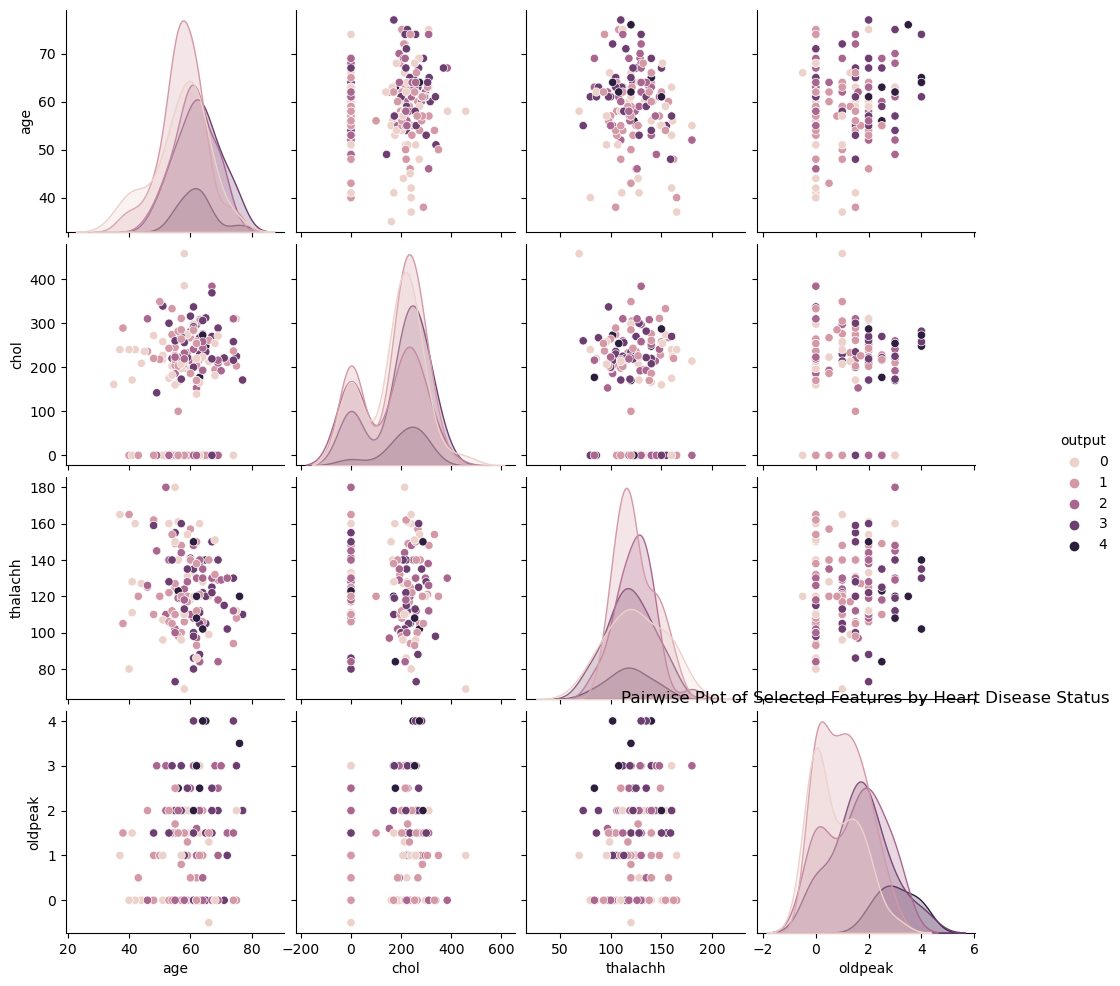

In [21]:
selected_features = ['age', 'chol', 'thalachh', 'oldpeak', 'output']
plt.figure(figsize=(10, 8))
sns.pairplot(df[selected_features], hue='output')
plt.title('Pairwise Plot of Selected Features by Heart Disease Status')
plt.show()

C:\Users\darsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


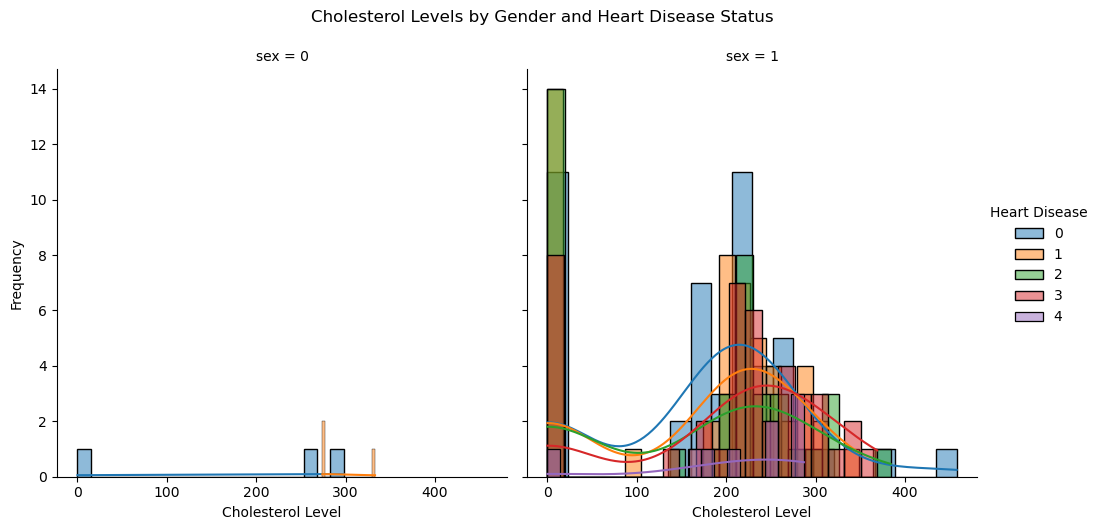

In [22]:
g = sns.FacetGrid(df, col='sex', hue='output', height=5)
g.map(sns.histplot, 'chol', bins=20, kde=True)
g.set_axis_labels('Cholesterol Level', 'Frequency')
g.add_legend(title='Heart Disease')
plt.suptitle('Cholesterol Levels by Gender and Heart Disease Status', y=1.05)
plt.show()

output
1    56
0    51
3    42
2    41
4    10
Name: count, dtype: int64


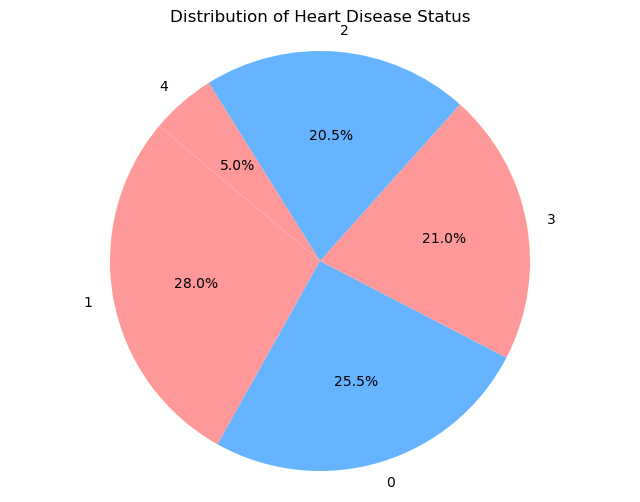

In [29]:
# Count the number of individuals with and without heart disease
heart_disease_counts = df['output'].value_counts()

# Print the counts for verification
print(heart_disease_counts)

# Create labels for the pie chart
labels = heart_disease_counts.index.tolist()

# Create colors for the pie chart
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Disease Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()